# 04. Exploratory Data Analysis - PySpark

## 04.1. Importação das bibliotecas

### 04.1.1. Importando as bibliotecas nativas do Python

In [1]:
import sys

### 04.1.2. Importando as bibliotecas de terceiros

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession, types as T
from pyspark.sql.functions import *

### 04.1.3. Importando os módulos locais do projeto

In [3]:
sys.path.append('..')
import functions.fn_charts_pandas as fn_charts_pandas
import functions.fn_stats_pyspark as fn_stats_pyspark
import params.consts as consts

## 04.2. Visão geral dos dados

### 04.2.0. Iniciando a sessão Spark

In [4]:
spark = SparkSession.builder.appName('spark').getOrCreate()

### 04.2.1. Habilitando a exibição de todas as colunas

In [5]:
pd.set_option('display.max_columns', None)

### 04.2.2. Armazenando o dataset em uma variável

In [6]:
df = spark.read \
    .format('parquet') \
    .load(consts.DATASET_CLEAN_PYSPARK)

### 04.2.3. Visualizando a quantidade de linhas e colunas do dataset

In [7]:
(df.count(), len(df.columns))

(881659, 11)

### 04.2.4. Exibindo o dataset

In [8]:
df.show(5)

+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|idade|  sexo|total_gasto|assinatura|duracao_contrato|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|meses_ultima_interacao|cancelou|
+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
| 62.0|Female|      410.0|     Basic|          Annual|              24.0|          30.0|                3.0|       13.0|                  27.0|     1.0|
| 29.0|  Male|      598.0|  Standard|          Annual|               7.0|          11.0|                7.0|       29.0|                   5.0|     1.0|
| 21.0|  Male|      988.0|   Premium|       Quarterly|              16.0|           9.0|                7.0|       23.0|                   9.0|     1.0|
| 23.0|  Male|      161.0|  Standard|       Quarterly|              59.0|         

### 04.2.5. Visualizando os detalhes do dataset

In [9]:
df.printSchema()

root
 |-- idade: double (nullable = true)
 |-- sexo: string (nullable = true)
 |-- total_gasto: double (nullable = true)
 |-- assinatura: string (nullable = true)
 |-- duracao_contrato: string (nullable = true)
 |-- tempo_como_cliente: double (nullable = true)
 |-- frequencia_uso: double (nullable = true)
 |-- ligacoes_callcenter: double (nullable = true)
 |-- dias_atraso: double (nullable = true)
 |-- meses_ultima_interacao: double (nullable = true)
 |-- cancelou: double (nullable = true)



### 04.2.6. Visualizando as estatísticas das colunas numéricas

In [10]:
fn_stats_pyspark.summary(df).show(truncate = False)

+-------+--------+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|summary|idade   |sexo  |total_gasto|assinatura|duracao_contrato|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|meses_ultima_interacao|cancelou|
+-------+--------+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|count  |881659.0|881659|881659.0   |881659    |881659          |881659.0          |881659.0      |881659.0           |881659.0   |881659.0              |881659.0|
|mean   |39.37   |NULL  |631.62     |NULL      |NULL            |31.26             |15.81         |3.6                |12.97      |14.48                 |0.57    |
|stddev |12.44   |NULL  |240.8      |NULL      |NULL            |17.26             |8.59          |3.07               |8.26       |8.6                   |0.5     |
|min    |18.0   

### 04.2.7. Visualizando as estatísticas da colunas categóricas

In [11]:
categorical_columns = [field.name for field in df.schema.fields if isinstance(field.dataType, T.StringType)]

df.describe(categorical_columns).show()

+-------+------+----------+----------------+
|summary|  sexo|assinatura|duracao_contrato|
+-------+------+----------+----------------+
|  count|881659|    881659|          881659|
|   mean|  NULL|      NULL|            NULL|
| stddev|  NULL|      NULL|            NULL|
|    min|Female|     Basic|          Annual|
|    max|  Male|  Standard|       Quarterly|
+-------+------+----------+----------------+



### 04.2.8. Verificando as colunas com valores nulos

In [12]:
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-----+----+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|idade|sexo|total_gasto|assinatura|duracao_contrato|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|meses_ultima_interacao|cancelou|
+-----+----+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|    0|   0|          0|         0|               0|                 0|             0|                  0|          0|                     0|       0|
+-----+----+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+



## 04.3. Análise exploratória dos dados

### 04.3.0. Convertendo o df PySpark para Pandas

In [13]:
df_pd = df.toPandas()

### 04.3.1. Criando um histograma para entender a distribuição dos dados das colunas

- Gráfico: Histograma.


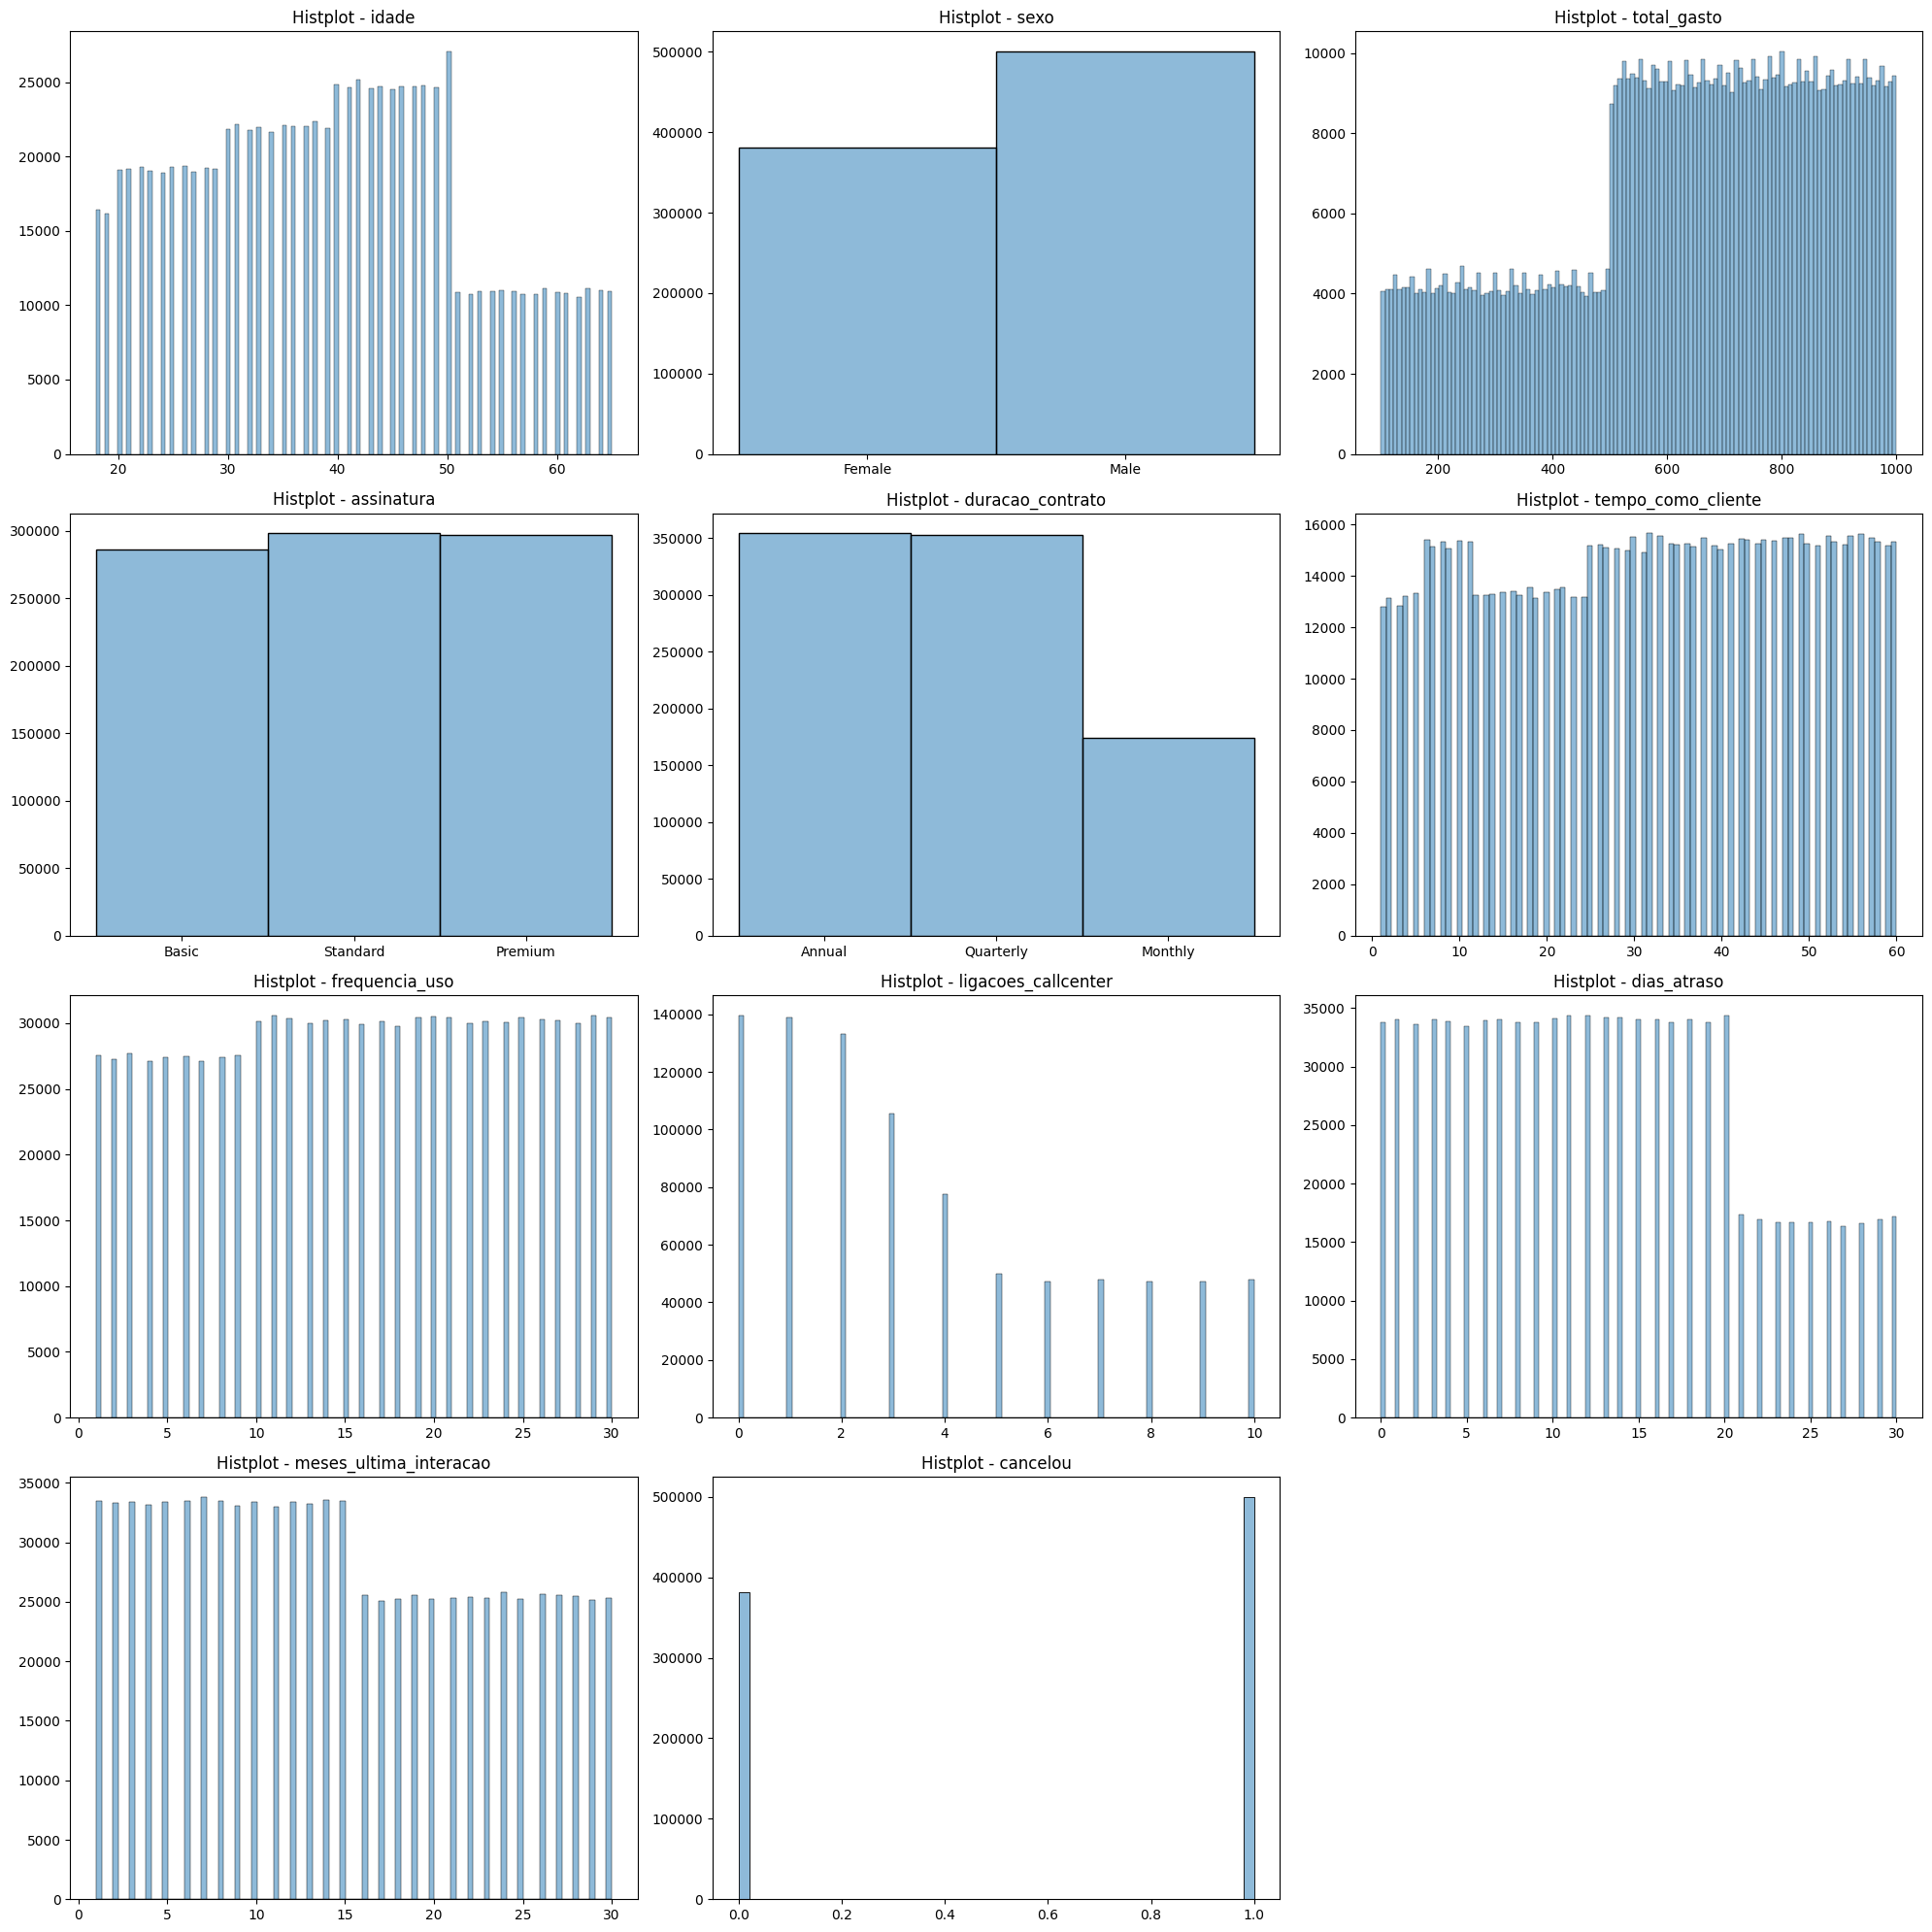

In [14]:
print('- Gráfico: Histograma.')

fn_charts_pandas.histplot(df_pd, df_pd.columns)

plt.savefig(f'../images/outputs/charts/pyspark/nb04_histplot.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

plt.show()

### 04.3.2. Criando gráficos de dispersão para entender inicialmente a distribuição dos dados de acordo com colunas com alta cardinalidade, amplitude e escala contínua

- Gráfico: Gráfico de Dispersão.

- Scatter Column: idade.



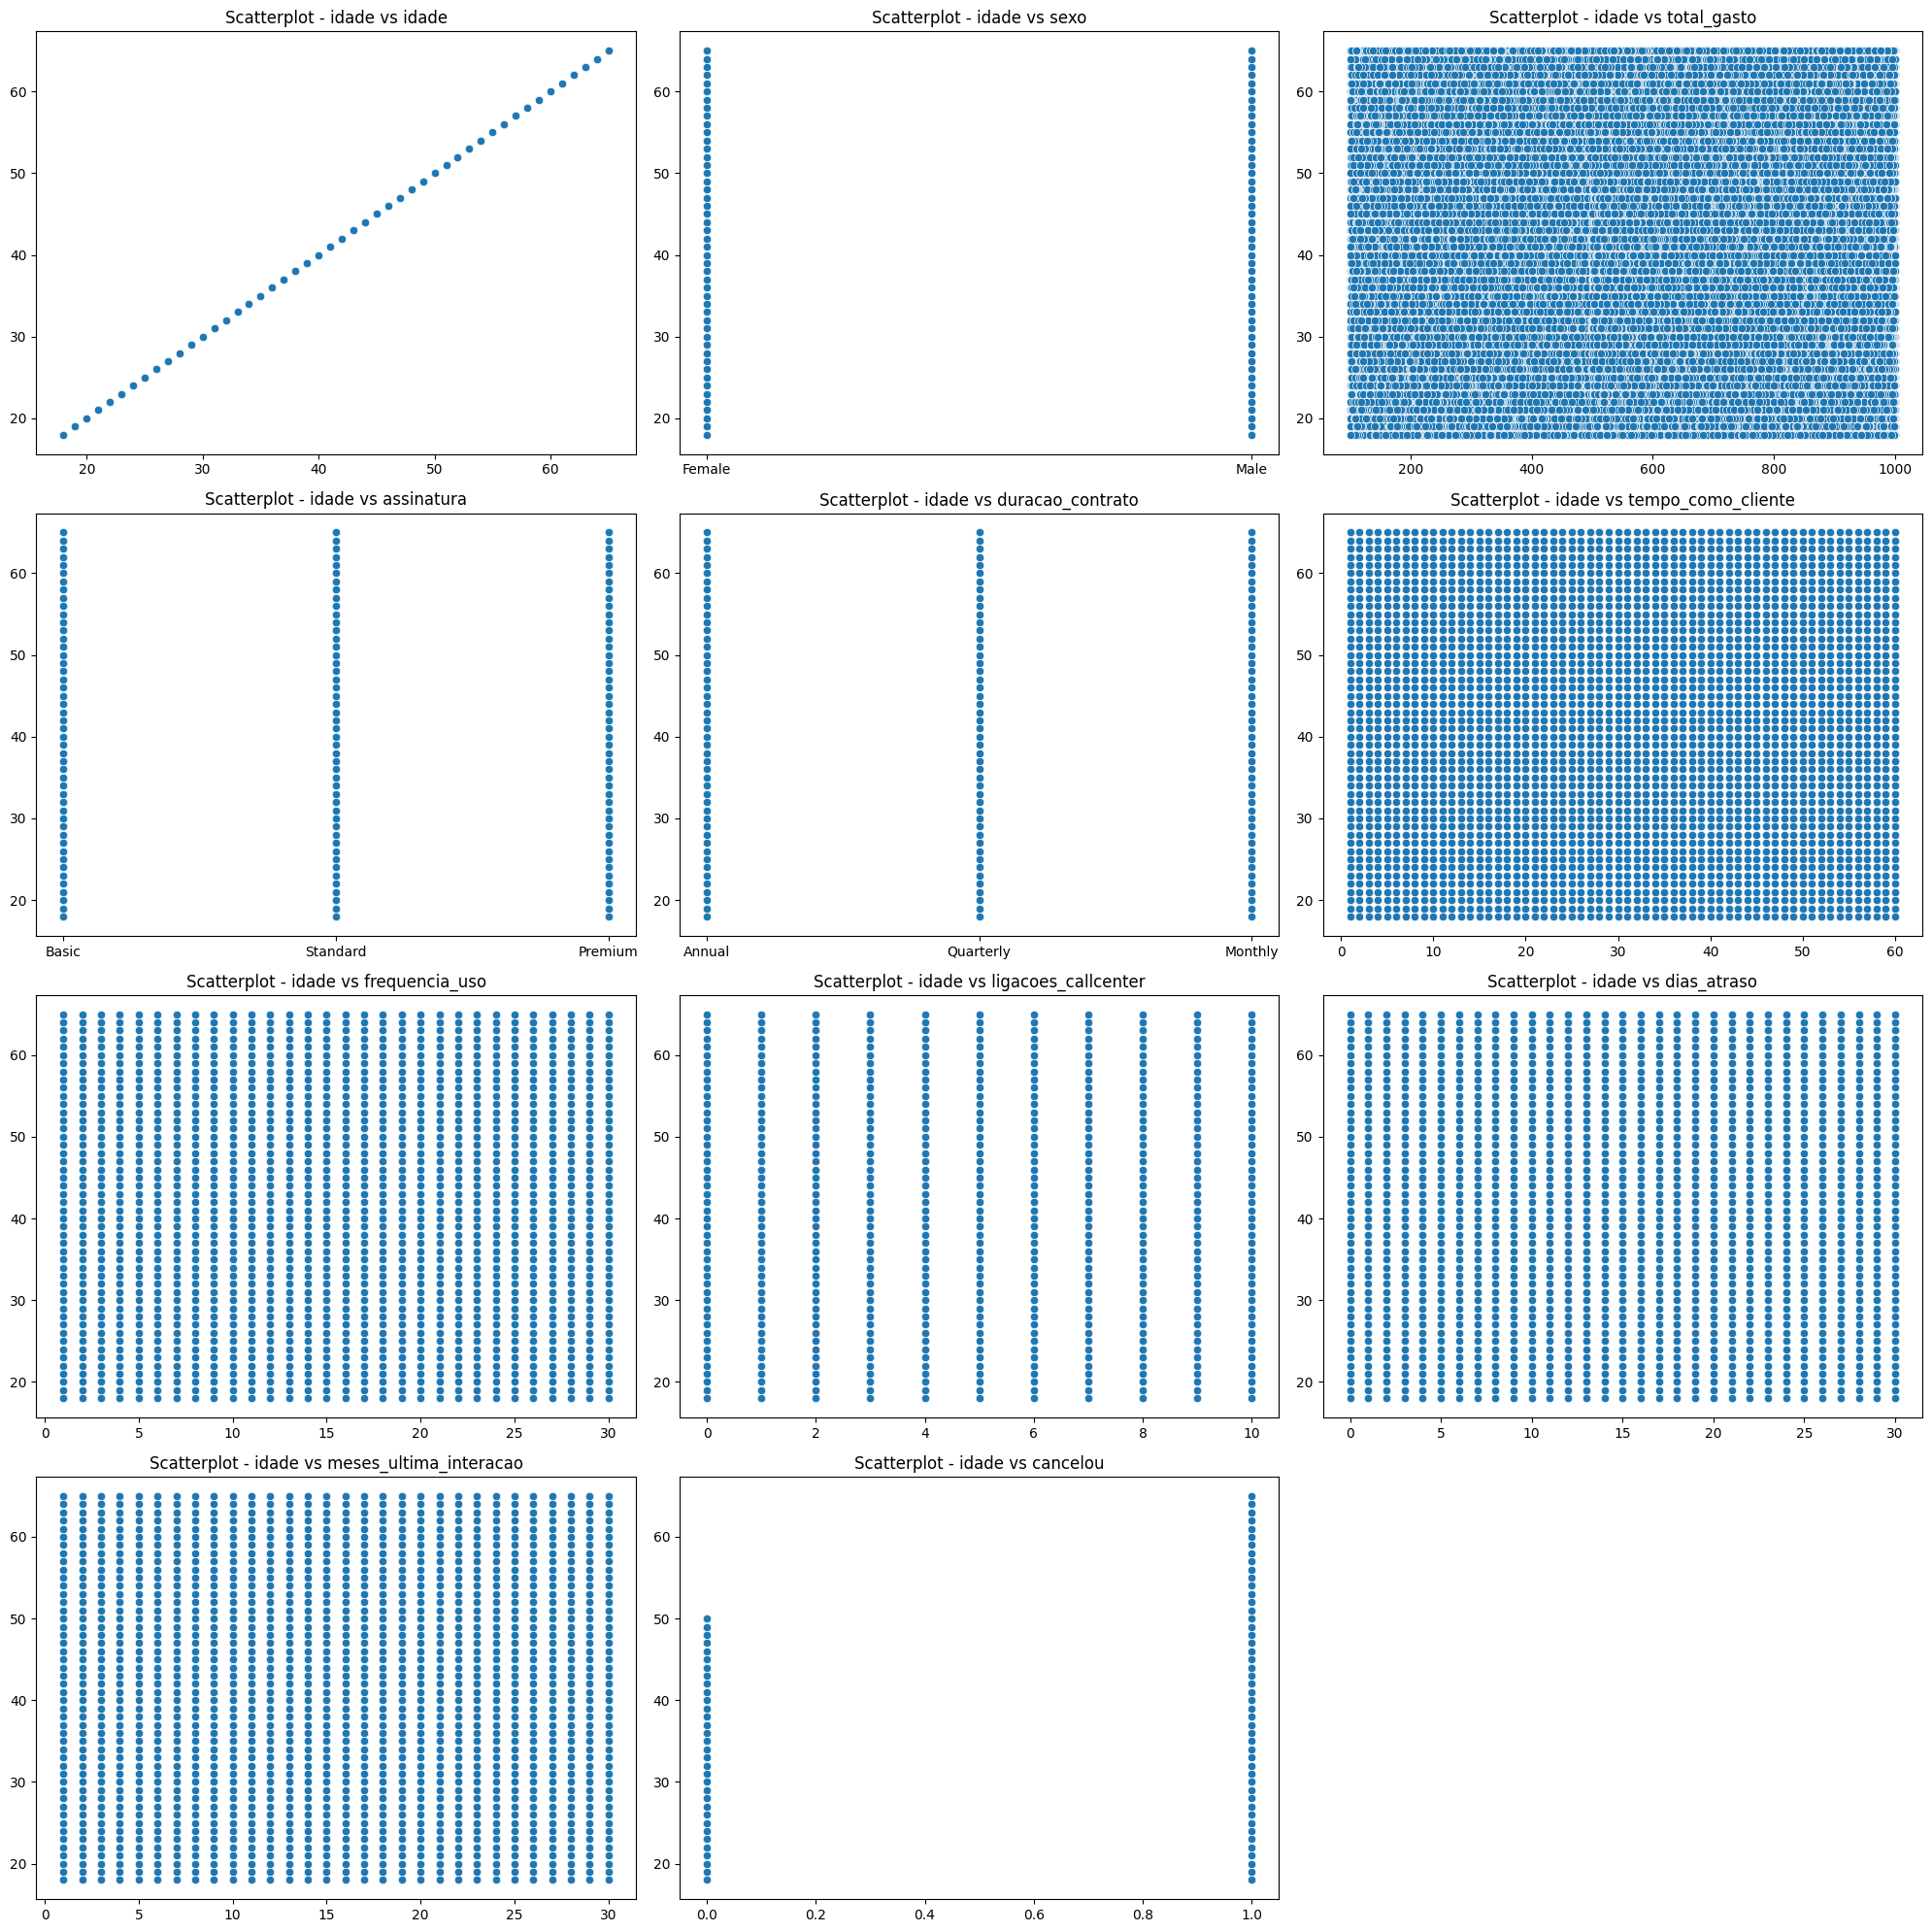

- Gráfico: Gráfico de Dispersão.

- Scatter Column: total_gasto.



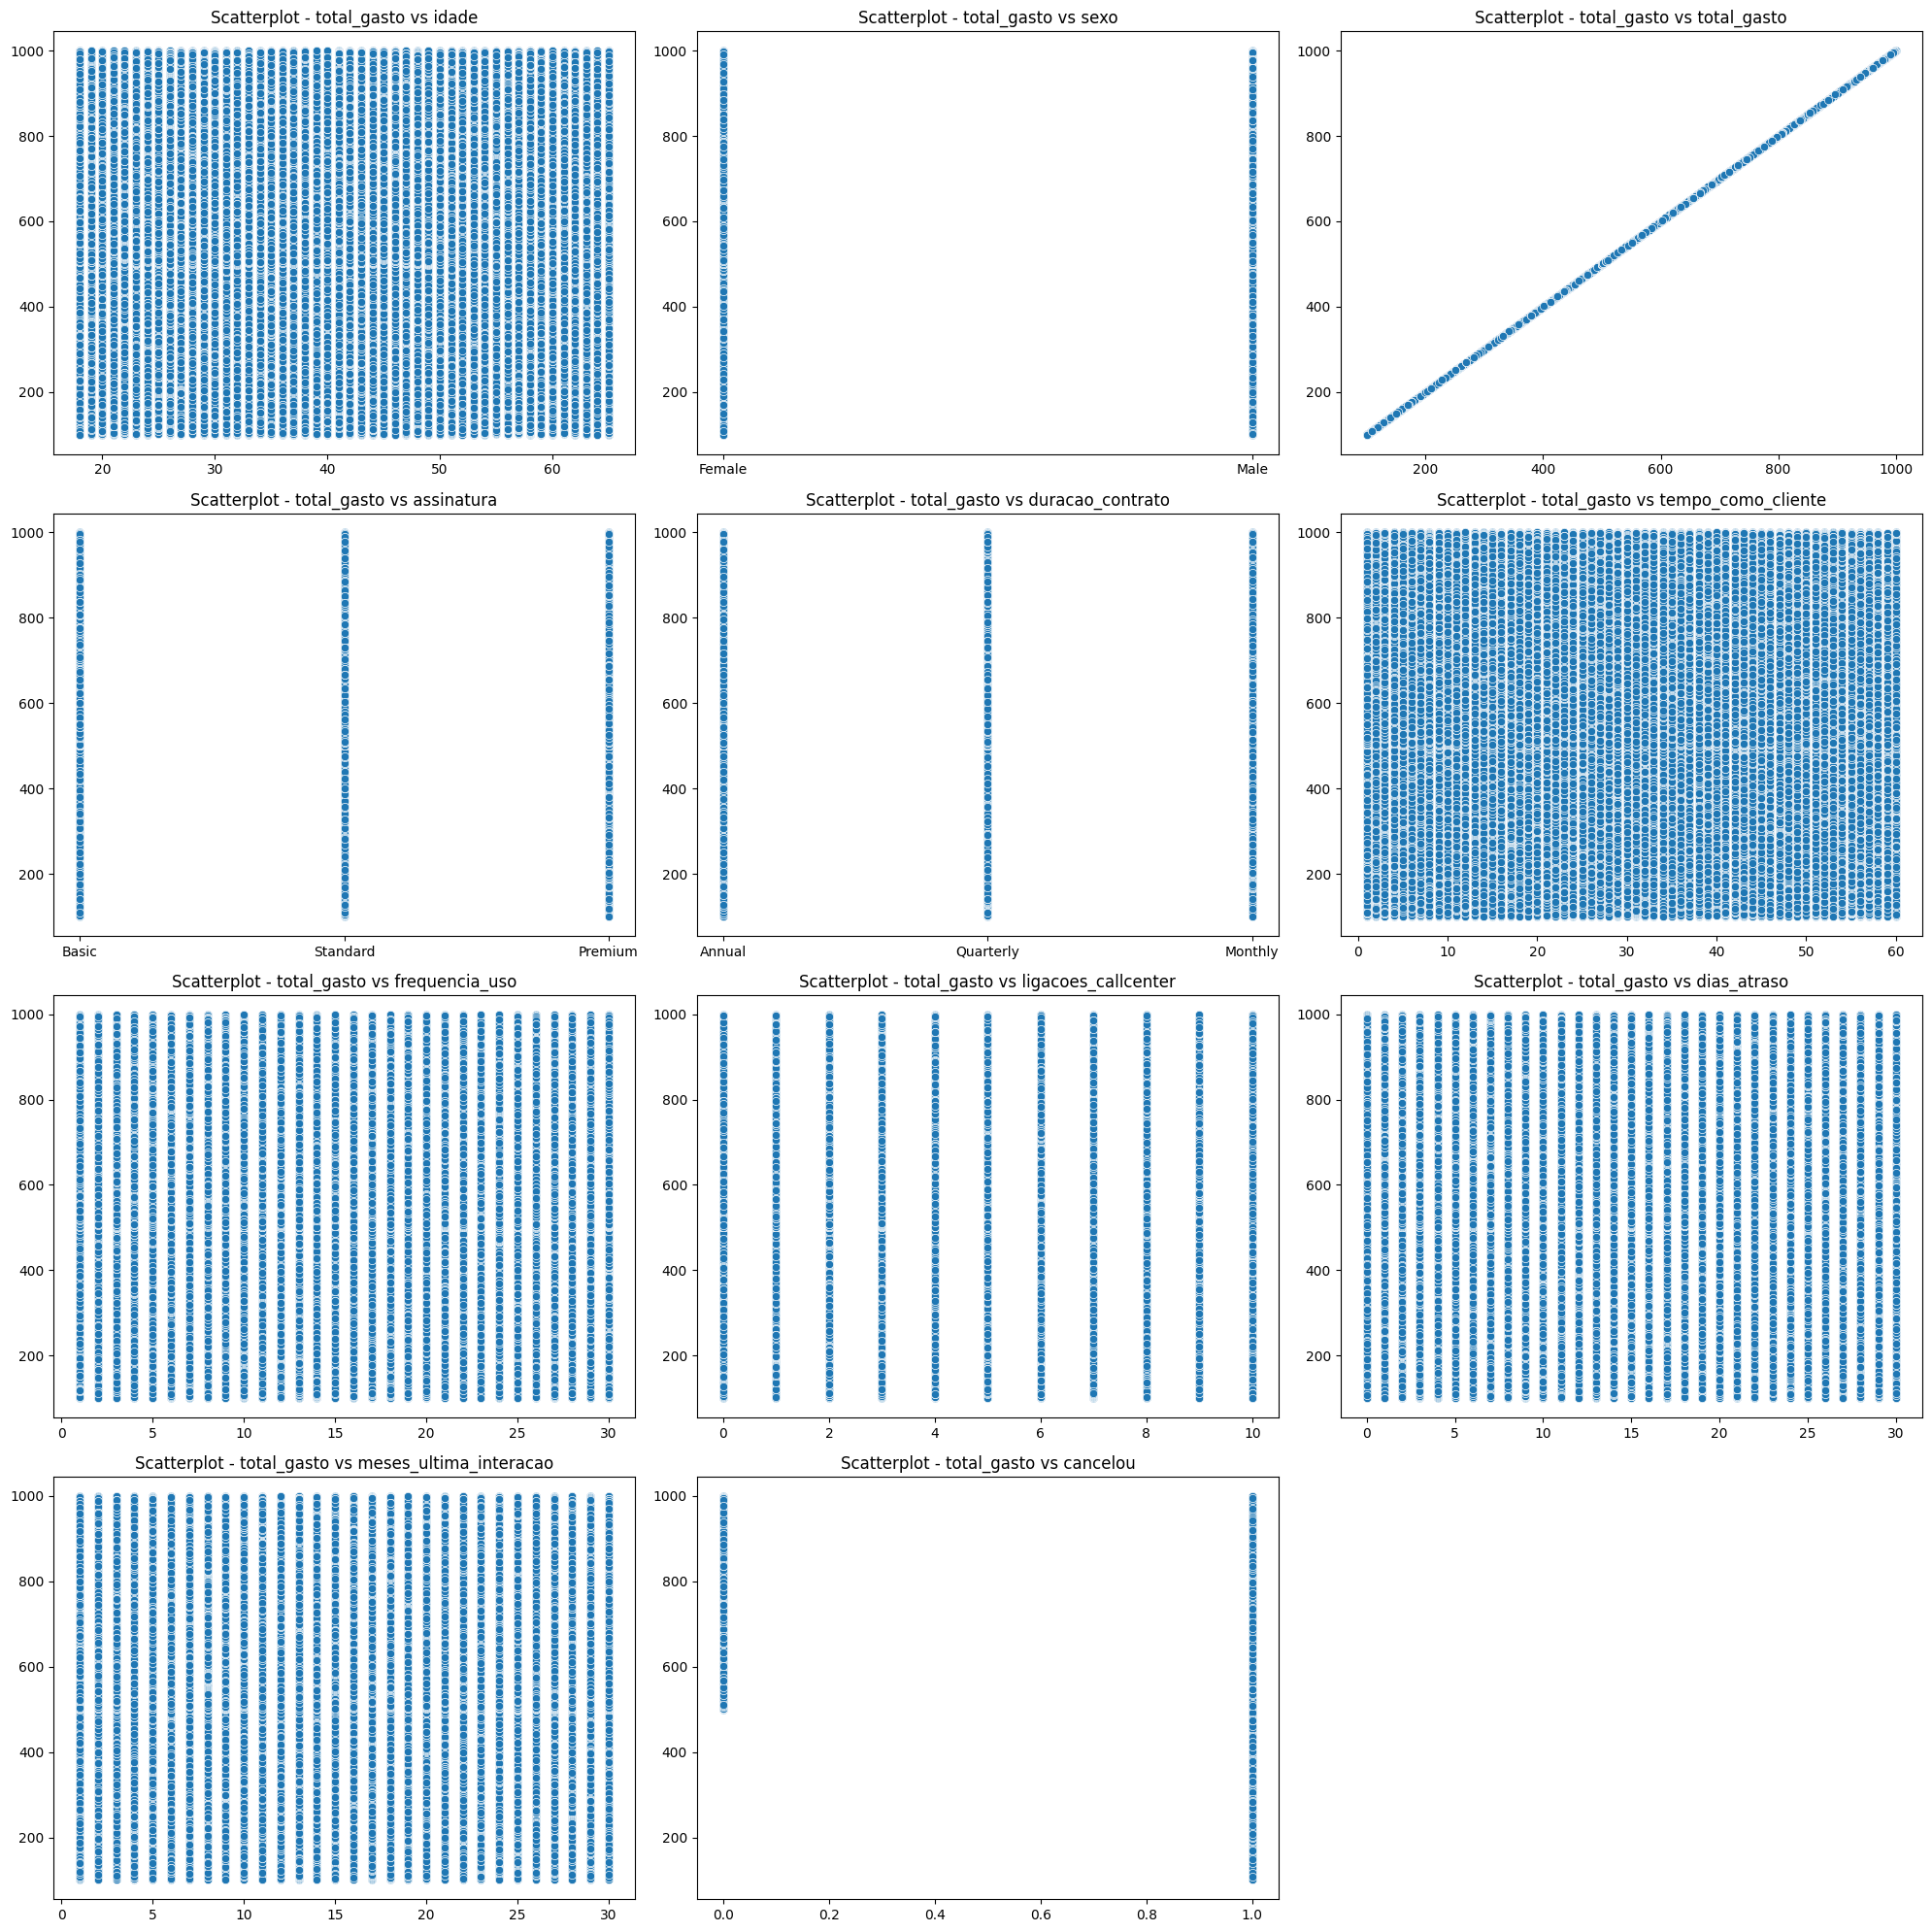

In [15]:
scatter_columns = ['idade', 'total_gasto']

for i in scatter_columns:

    print('- Gráfico: Gráfico de Dispersão.\n')

    print(f'- Scatter Column: {i}.\n')

    fn_charts_pandas.scatterplot(df_pd, df_pd.columns, i)

    plt.savefig(f'../images/outputs/charts/pyspark/nb04_scatterplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

### 04.3.3. Definindo as colunas com potencial de gerar os insights mais relevantes

In [16]:
hue_columns = [
    'cancelou', 
] 

### 04.3.4. Criando histogramas de acordo com as hue columns para extrair insights

- Gráfico: Histograma.

- Hue Column: cancelou.


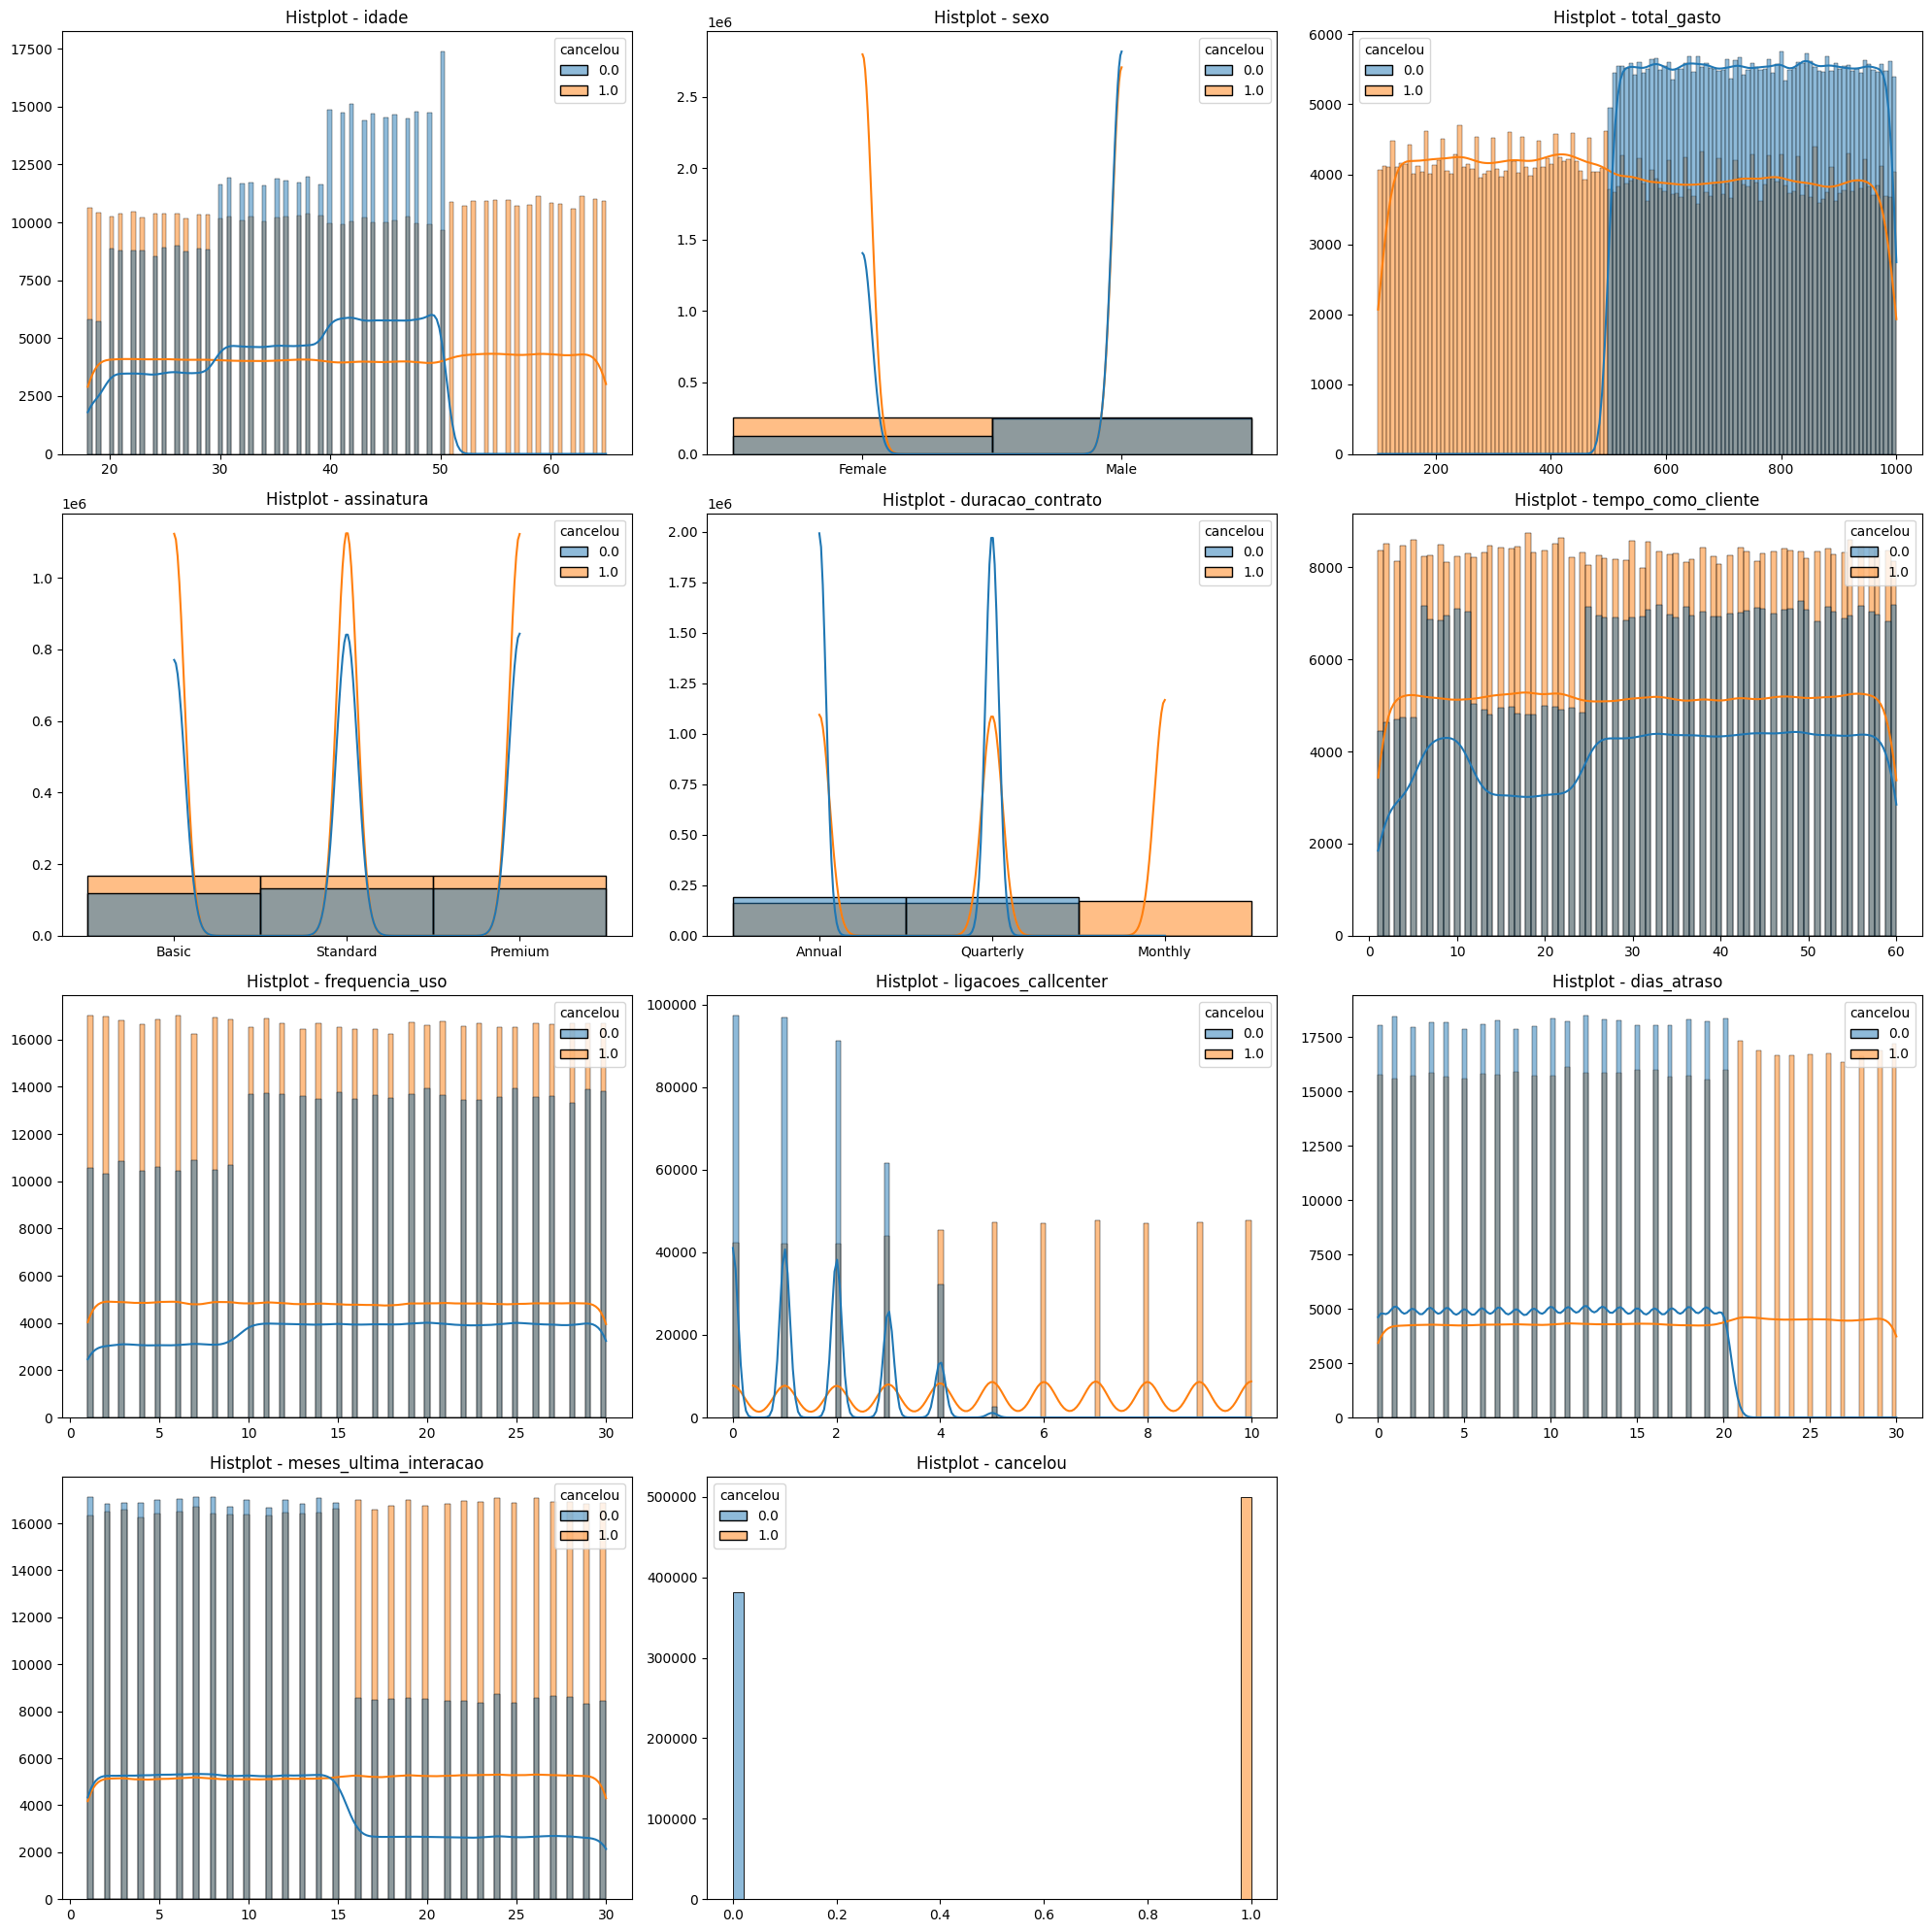

In [17]:
for i in hue_columns:

    print('- Gráfico: Histograma.\n')

    print(f'- Hue Column: {i}.')

    fn_charts_pandas.histplot(df_pd, df_pd.columns, i, kde = True)

    plt.savefig(f'../images/outputs/charts/pyspark/nb04_histplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

### 04.3.5. Listando os insights encontrados nos histogramas

| Hue Column | Column                | Intensidade | Insight                                                                           |
|------------|-----------------------|-------------|-----------------------------------------------------------------------------------|
| cancelou   | idade                 | Evidente    | Quem cancelou, tende a ter mais de 50 anos (o contrário também)                   |
| cancelou   | total_gasto            | Evidente    | Quem cancelou, tende a ter gasto menos de 500,00 (o contrário também)             |
| cancelou   | duracao_contrato      | Evidente    | Quem cancelou, tende a ter um contrato mensal (o contrário também)                |
| cancelou   | ligacoes_callcenter   | Evidente    | Quem cancelou, tende a ligar mais de 5 vezes no callcenter (o contrário também)   |
| cancelou   | dias_atraso           | Evidente    | Quem cancelou, tende a ter mais de 20 dias de atraso no pagamento (o contrário também) |
| cancelou   | meses_ultima_interacao | Sutil       | Quem cancelou, tende a ficar mais de 15 meses sem interação (o contrário também)  |

### 04.3.6. Armazenando as principais colunas dos insights encontrados de acordo com sua hue column

In [18]:
columns_cancelou = ['idade', 'total_gasto', 'ligacoes_callcenter', 'dias_atraso', 'meses_ultima_interacao']

### 04.3.7. Criando diagramas de caixa para corroborar os insights encontrados nos histogramas

- Gráfico: Diagrama de Caixa.

- Hue Column: cancelou.


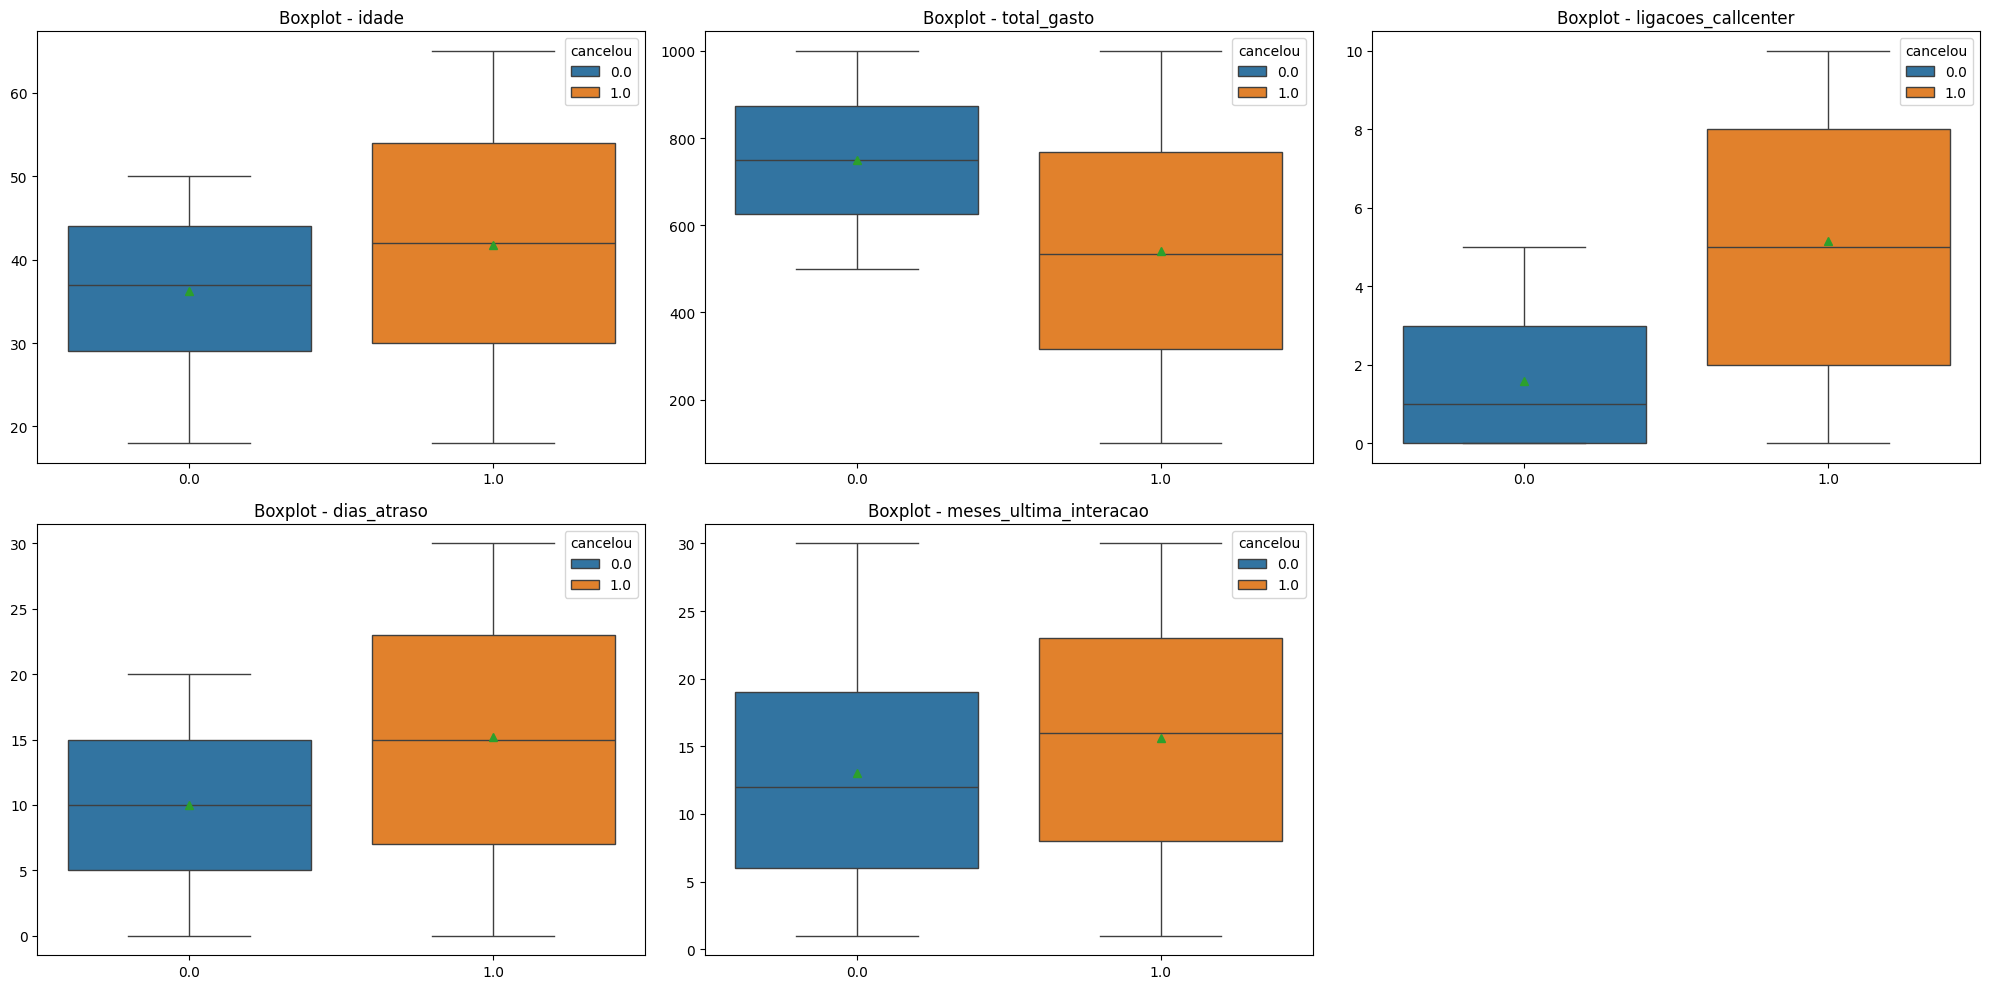

In [19]:
for i in hue_columns:

    print('- Gráfico: Diagrama de Caixa.\n')

    print(f'- Hue Column: {i}.')

    fn_charts_pandas.boxplot(df_pd, eval(f'columns_{i}'), i, i)

    plt.savefig(f'../images/outputs/charts/pyspark/nb04_boxplot_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

### 04.3.8. Criando um mapa de calor para corroborar os insights encontrados nos histogramas

- Gráfico: Mapa de Calor.


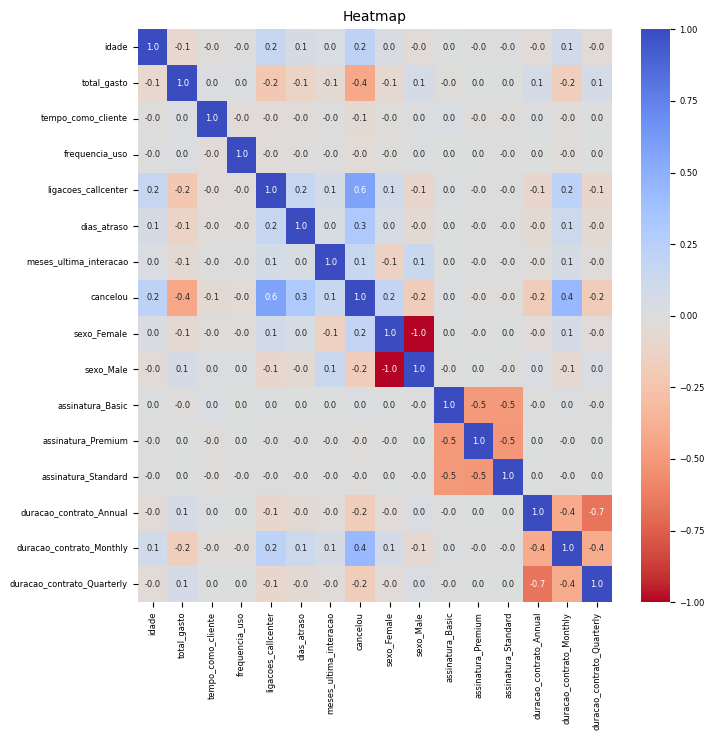

In [20]:
print('- Gráfico: Mapa de Calor.')

df_heatmap = pd.get_dummies(df_pd).corr()

fn_charts_pandas.heatmap(df_heatmap)

plt.savefig(f'../images/outputs/charts/pyspark/nb04_heatmap.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

plt.show()

### 04.3.9. Criando gráficos de barras para corroborar os insights encontrados nos histogramas e possivelmente gerando novos insights

- Gráfico: Gráfico de Barras.


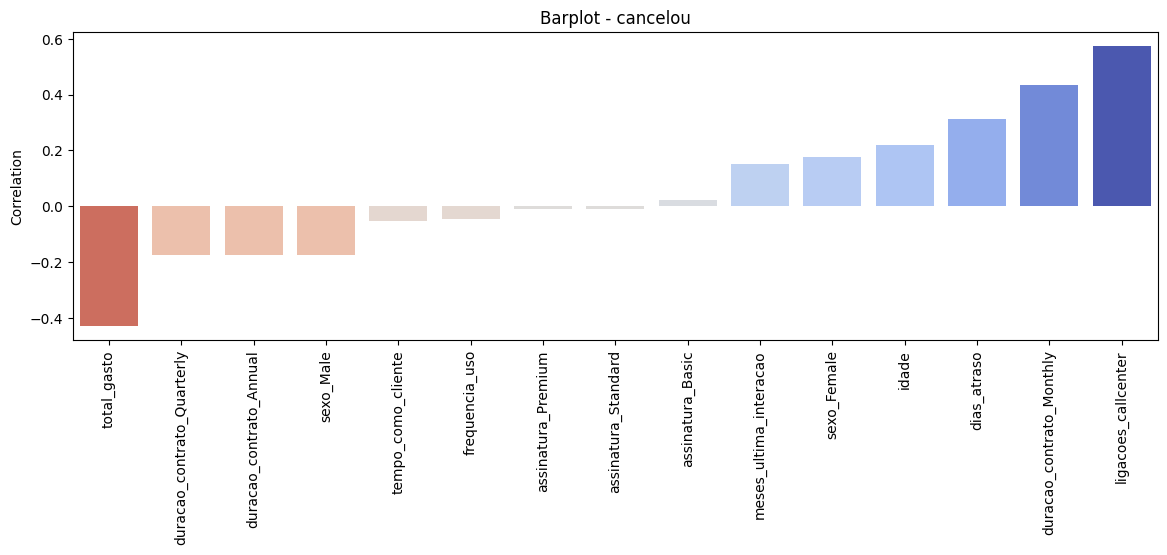

In [21]:
df_heatmap_unstack = (df_heatmap.unstack().rename('correlation').to_frame())

numeric_hue_columns = [hue_columns[i] for i in [0]]

for i in numeric_hue_columns:

    print('- Gráfico: Gráfico de Barras.')

    corr = df_heatmap_unstack.loc[i].sort_values('correlation')[:-1]

    fn_charts_pandas.barplot_correlation(corr, corr['correlation'], corr['correlation'].max(), i)

    plt.savefig(f'../images/outputs/charts/pyspark/nb04_barplot_correlation_{i.lower()}.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

    plt.show()

## 04.4. Geração dos insights

### 04.4.1. Identificando os grupos de clientes com base na análise exploratória

| **Grupo 1**        | **Grupo 1**           | **Grupo 2**       | **Grupo 2**          |
|-----------------------------------|---------------------------------------|-----------------------------------|--------------------------------------|
| **Qualitativo**         | **Quantitativo**           | **Qualitativo**         | **Quantitativo**           |
| Mais de 50 anos                    | Idade > 50                 | Menos de 50 anos                    | Idade <= 50                     |
| Gastou menos de 500,00             | Gastos < 500               | Gastou mais de 500,00               | Gastos >= 500                   |
| Possui um contrato mensal          | Contrato = Mensal          | Possui contratos anual e trimestral | Contrato != Mensal              |
| Já ligou mais de 5 vezes no callcenter | Ligações Callcenter > 5    | Já ligou menos de 5 vezes no callcenter | Ligações Callcenter <= 5         |
| Atrasa o pagamento em mais de 20 dias | Dias de Atraso > 20        | Não atrasa o pagamento em mais de 20 dias | Dias de Atraso <= 20           |
| Fica mais de 15 meses sem interação | Meses sem Interação > 15   | Fica menos de 15 meses sem interação | Meses sem Interação <= 15        |

### 04.4.2. Verificando o percentual de conversão da campanha inicialmente

- Agrupamento da coluna: cancelou
+--------+----------+------+
|cancelou|Percentage|Count |
+--------+----------+------+
|0.0     |43.3      |381666|
|1.0     |56.7      |499993|
+--------+----------+------+



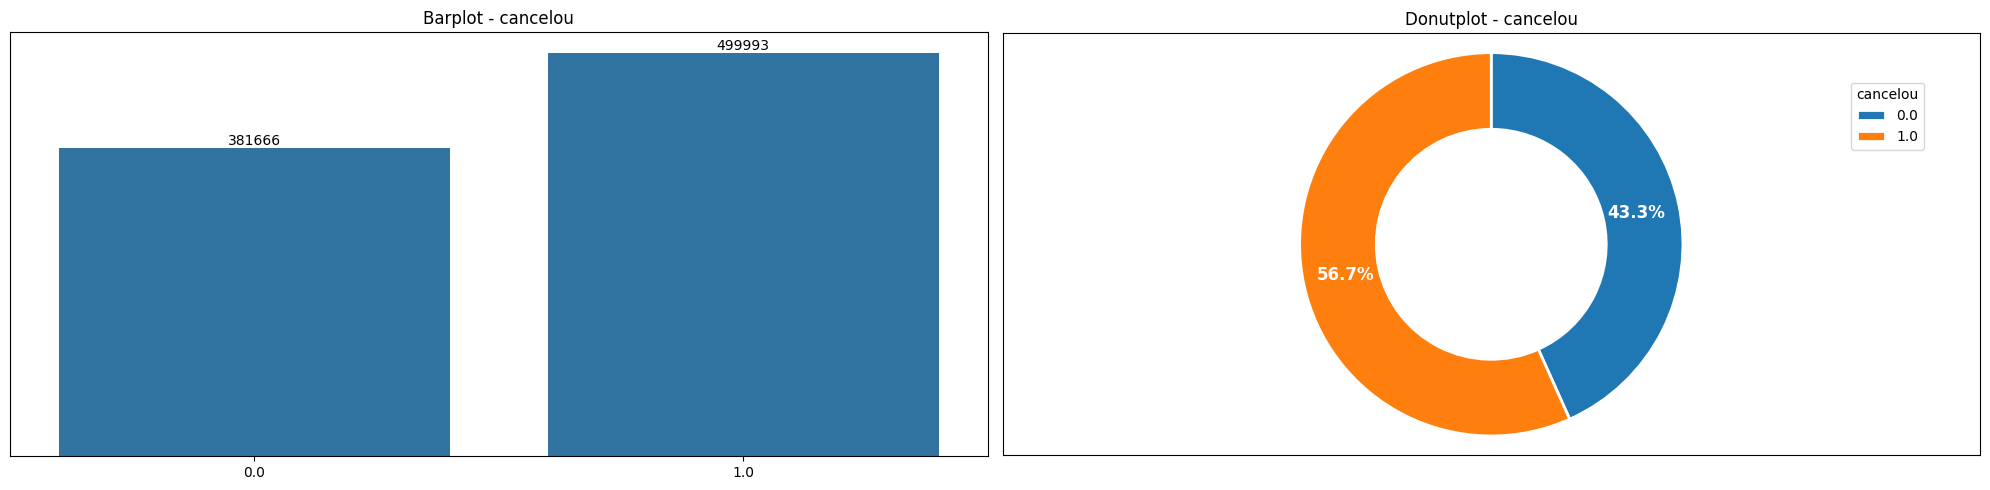

In [22]:
df_agg = fn_stats_pyspark.groupby_count(df, 'cancelou')

print(f'- Agrupamento da coluna: cancelou')

df_agg.show(truncate = False)

fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), 'cancelou', 'Count')

plt.savefig(f'../images/outputs/charts/pyspark/nb04_barplot_donutplot_cancelou_v1.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

plt.show()

### 04.4.3. Atualizando o dataset de acordo com o grupo mais propenso a aceitar campanhas

In [23]:
df = df.filter(col('idade') <= 50) \
       .filter(col('total_gasto') >= 500) \
       .filter(col('assinatura') != 'Mensal') \
       .filter(col('ligacoes_callcenter') <= 5) \
       .filter(col('dias_atraso') <= 20) \
       .filter(col('meses_ultima_interacao') <= 15)

### 04.4.4. Verificando o percentual de conversão da campanha de acordo com o grupo mais propenso a aceitar campanhas

- Agrupamento da coluna: cancelou
+--------+----------+------+
|cancelou|Percentage|Count |
+--------+----------+------+
|0.0     |92.0      |254064|
|1.0     |8.0       |22177 |
+--------+----------+------+



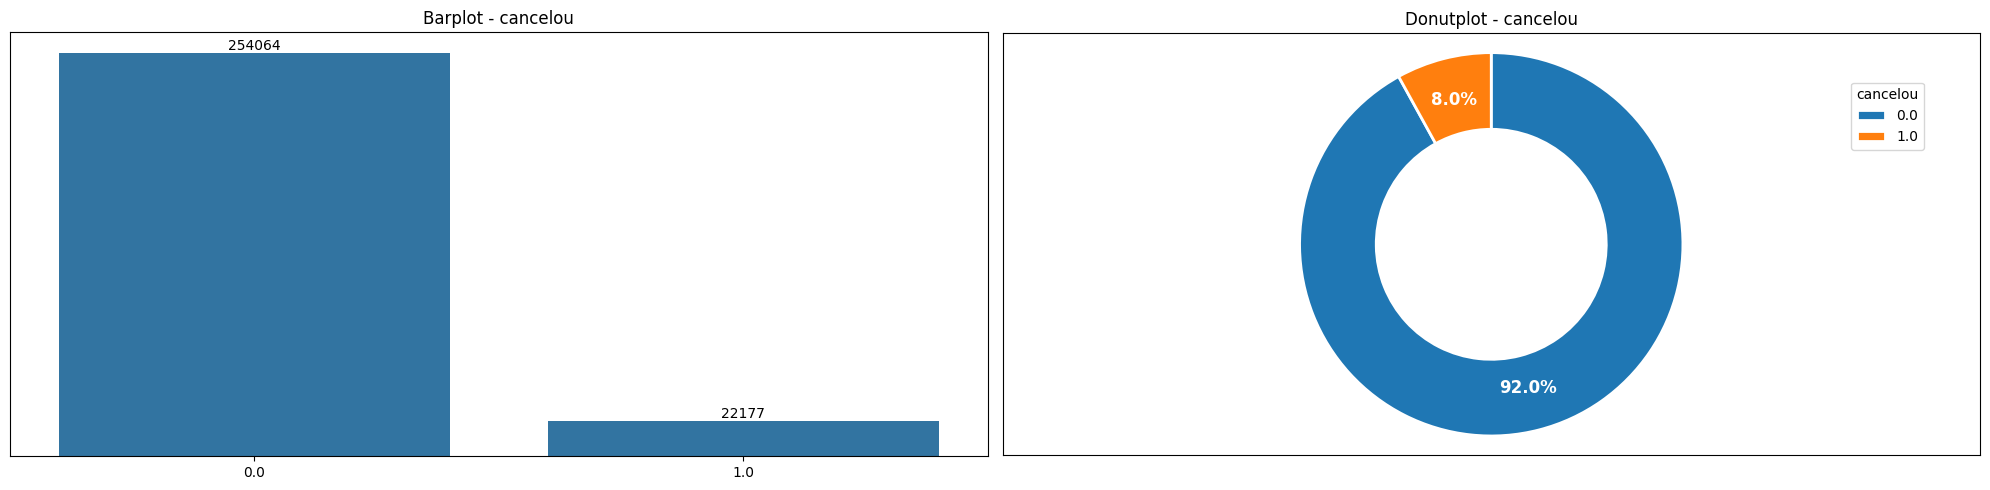

In [24]:
df_agg = fn_stats_pyspark.groupby_count(df, 'cancelou')

print(f'- Agrupamento da coluna: cancelou')

df_agg.show(truncate = False)

fn_charts_pandas.barplot_donutplot(df_agg.toPandas(), 'cancelou', 'Count')

plt.savefig(f'../images/outputs/charts/pyspark/nb04_barplot_donutplot_cancelou_v2.png', format = 'png', dpi = 75, bbox_inches = 'tight', transparent = True)

plt.show()

### 04.4.5. Exibindo o dataset de acordo com o grupo mais propenso a aceitar campanhas

In [25]:
df.show()

+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
|idade|  sexo|total_gasto|assinatura|duracao_contrato|tempo_como_cliente|frequencia_uso|ligacoes_callcenter|dias_atraso|meses_ultima_interacao|cancelou|
+-----+------+-----------+----------+----------------+------------------+--------------+-------------------+-----------+----------------------+--------+
| 33.0|  Male|      530.0|   Premium|       Quarterly|              11.0|           9.0|                3.0|        1.0|                  11.0|     0.0|
| 19.0|Female|      947.0|  Standard|         Monthly|              53.0|          30.0|                0.0|        8.0|                   8.0|     1.0|
| 18.0|  Male|      615.0|     Basic|          Annual|              53.0|          10.0|                5.0|       20.0|                   4.0|     1.0|
| 29.0|Female|      834.0|   Premium|       Quarterly|               3.0|         

### 04.4.6. Comentando os insights e o potencial de impacto da análise exploratória dos dados

Após realizar o estudo de acordo com o grupo mais propenso a manter sua assinatura conforme extraído pelos insights dessa análise exploratória dos dados, estimamos a evolução da coluna target (cancelou). 

Essa coluna cancelou corresponde a quantidade de clientes que cancelaram a assinatura com a empresa. 

Como resultado, inicialmente tínhamos um total de cancelamentos de clientes de **56,7%** e após focar o estudo no grupo de clientes mais propenso a manter sua assinatura o total de cancelamentos foi para **8,0%**, representando assim uma **redução de 48,7%**.

O resultado encontrado foi excelente, onde **houve uma redução expressiva no índice de churn das assinaturas**. O único ponto de ressalva é que foram aplicadas condições para se chegar a esse resultado, deixando assim o número de clientes mais restrito. Dessa forma, é preciso discutir com a área de Negócios para estabelecer se esse resultado atende as necessidades da área ou é preciso fazer ajustes, como por exemplo reduzir o número de parâmetros para que a campanha possa atingir um número maior de clientes.